In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("auc.csv", names=["h2s", "i", "k", "p_svm", "ln_svm", "p_lr", "ln_lr"])
df

,h2s,i,k,p_svm,ln_svm,p_lr,ln_lr
0,0.05,10,5,0.694825,0.640699,0.622378,0.550210
1,0.05,10,25,0.791469,0.709650,0.776364,0.633566
2,0.05,10,100,0.857063,0.734825,0.803636,0.665175
3,0.05,10,300,0.868531,0.779021,0.692587,0.644196
4,0.05,11,5,0.770508,0.529297,0.645229,0.531808
...,...,...,...,...,...,...,...
595,1.00,8,300,0.918945,0.884208,0.913783,0.829799
596,1.00,9,5,0.720106,0.883899,0.797970,0.879171
597,1.00,9,25,0.877503,0.910178,0.853031,0.858732
598,1.00,9,100,0.941324,0.941324,0.922414,0.902113


In [1]:
hi noor hi dum dum 


SyntaxError: invalid syntax (2932852282.py, line 1)

In [ ]:
omg it works


In [ ]:
from FADS_SRP.thresholding import get_n_SNPs

In [ ]:
get_n_SNPs(get_ct(0.05, 1), 25)

array([934, 931, 617, 939, 930, 943, 618, 915, 950, 933, 982, 938, 556,
       953, 547, 541, 900, 568, 921, 868, 569, 570, 574, 575, 782])

In [ ]:
p_acc = []
ln_acc = []
h_ = []
i_ = []
k_ = []
for h2s in ["0.05", "0.5", "1"]:
    for i in range(1, 51):
        ct = get_ct(h2s, i)
        for k in [5, 10, 20, 25, 50, 100, 300]:
            h_.append(h2s)
            i_.append(i)
            k_.append(k)
            top_p = get_n_SNPs(ct, k)
            top_ln = list(reversed(np.argsort(ct["lambda"])))[:k]
            
            causals_caught_p = [snp in top_p for snp in ct.query("causal == 1").index]
            causals_caught_ln = [snp in top_ln for snp in ct.query("causal == 1").index]
            
            p_acc.append(sum(causals_caught_p))
            ln_acc.append(sum(causals_caught_ln))

In [ ]:
acc = pd.DataFrame({
    "h2s": h_,
    "i": i_,
    "k": k_,
    "p_acc": p_acc,
    "ln_acc": ln_acc
})

<AxesSubplot:xlabel='h2s', ylabel='p_acc'>

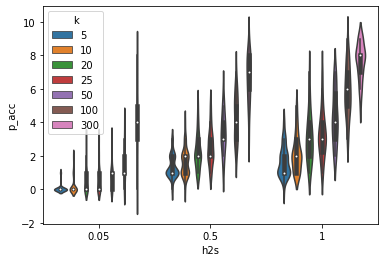

In [ ]:
sns.violinplot(x=acc["h2s"], y=acc["p_acc"], hue=acc["k"])

<AxesSubplot:xlabel='h2s', ylabel='ln_acc'>

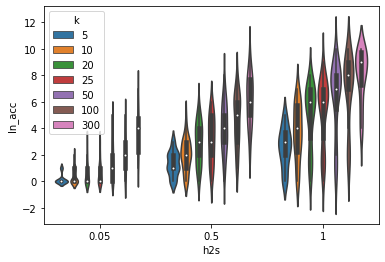

In [ ]:
sns.violinplot(x=acc["h2s"], y=acc["ln_acc"], hue=acc["k"])

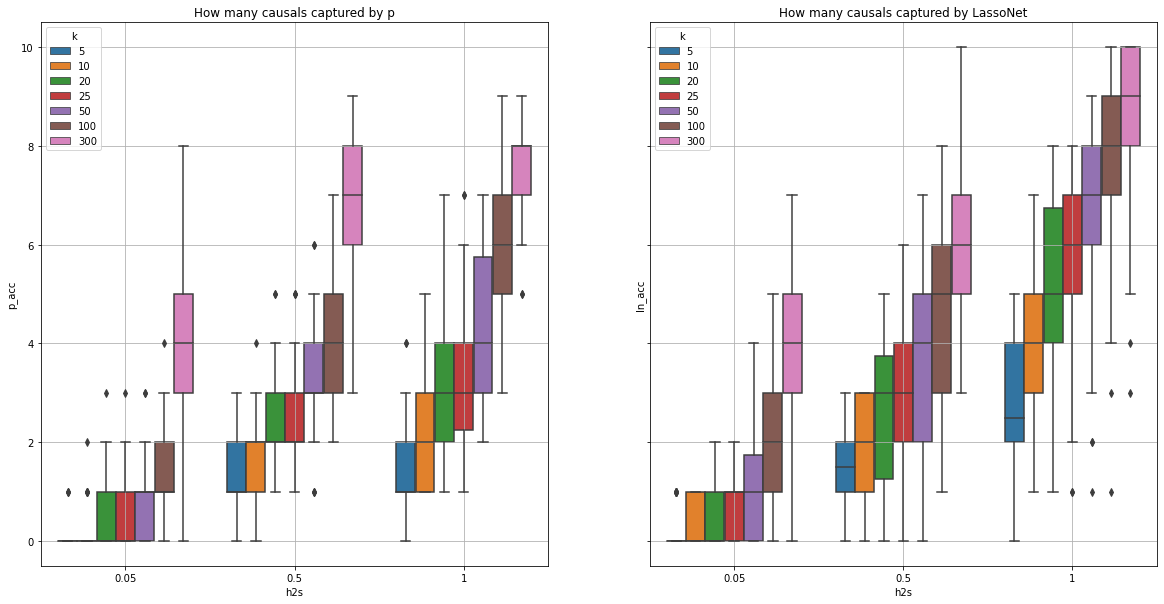

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
plt.sca(axes[0])
sns.boxplot(x=acc["h2s"], y=acc["p_acc"], hue=acc["k"])
plt.title("How many causals captured by p")
plt.grid()
plt.sca(axes[1])
plt.title("How many causals captured by LassoNet")
sns.boxplot(x=acc["h2s"], y=acc["ln_acc"], hue=acc["k"])
plt.grid()

plt.savefig("causals.jpeg")

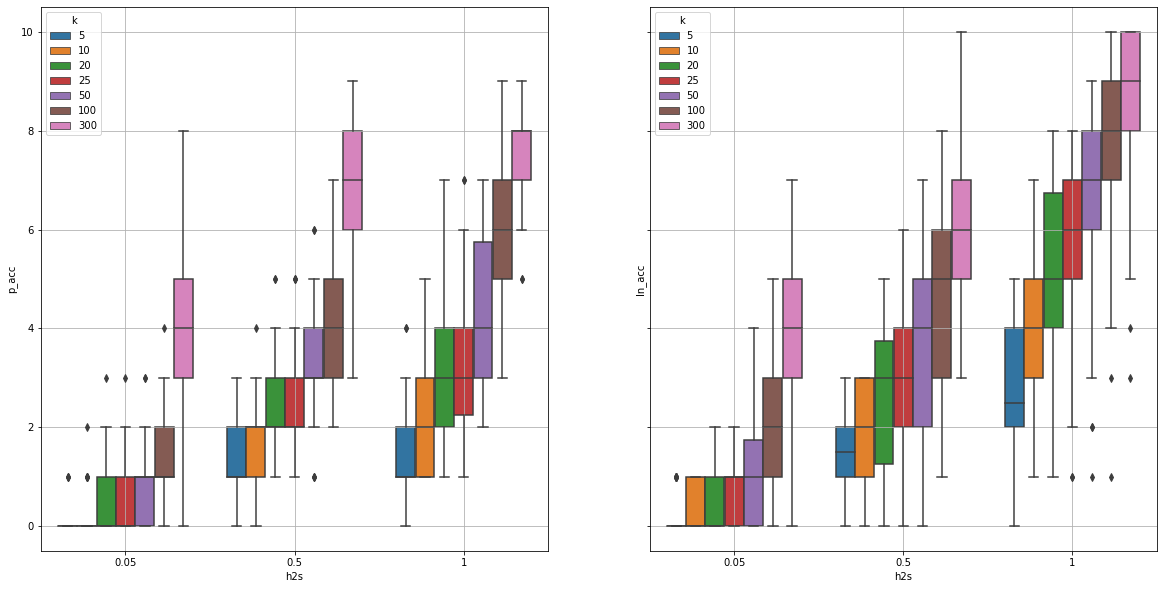

In [ ]:
df = pd.read_csv("auc.csv", names=["h2s", "i", "k", "p_svm", "ln_svm", "p_lr", "ln_lr"])
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
plt.sca(axes[0])
sns.boxplot(x=acc["h2s"], y=acc["p_acc"], hue=acc["k"])
plt.grid()
plt.sca(axes[1])
sns.boxplot(x=acc["h2s"], y=acc["ln_acc"], hue=acc["k"])
plt.grid()

<AxesSubplot:xlabel='h2s'>

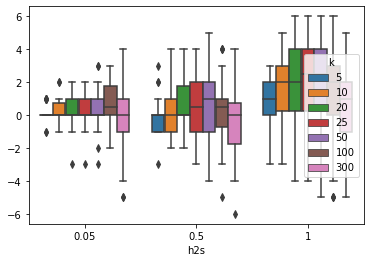

In [ ]:
sns.boxplot(x=acc["h2s"], y=acc["ln_acc"] - acc["p_acc"], hue=acc["k"])

(array([185., 212., 188., 144.,  90.,  75.,  56.,  43.,  43.,  14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

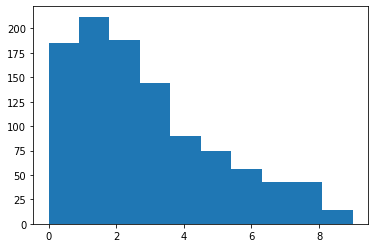

In [ ]:
plt.hist(p_acc)

(array([201., 158., 138., 113.,  97.,  73.,  81.,  76.,  60.,  53.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

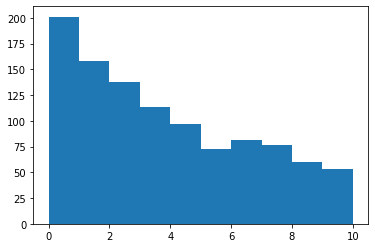

In [ ]:
plt.hist(ln_acc)